In [117]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
df_deliveries =pd.read_csv("deliveries.csv")
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [120]:
df_deliveries.replace("np.nan",'0')
df_deliveries.rename(columns={"match_id":"id"},inplace=True)



In [121]:
df_matches =pd.read_csv("matches.csv")
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [122]:
df_deliveries.shape


(179078, 21)

In [123]:
df_deliveries.columns

Index(['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [124]:
df_deliveries.describe()

,id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [125]:
df_deliveries.corr()

,id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


In [126]:
df_matches.shape

(756, 18)

In [127]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [128]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [129]:
df_matches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


In [130]:
df_deliveries.isnull().sum()

id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [131]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [132]:
df_matches.drop(columns=["umpire3"],inplace=True)

In [133]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [134]:
df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [135]:
df_matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

Text(0.5, 1.0, 'Matches Played Every Year')

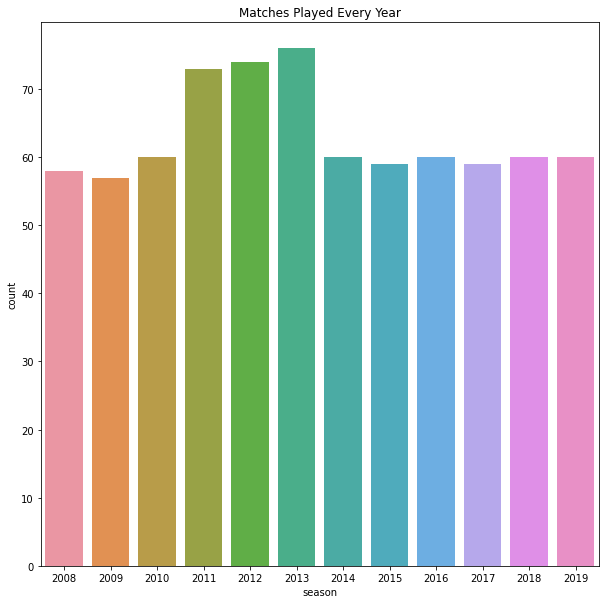

In [136]:
plt.figure(figsize=(10,10))
sns.countplot(x="season",data=df_matches)

plt.title("Matches Played Every Year")

In [137]:
# teams that have played ipl
df_matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [138]:
winner=df_matches['winner'].value_counts()
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Text(0.5, 1.0, 'Wins by Teams')

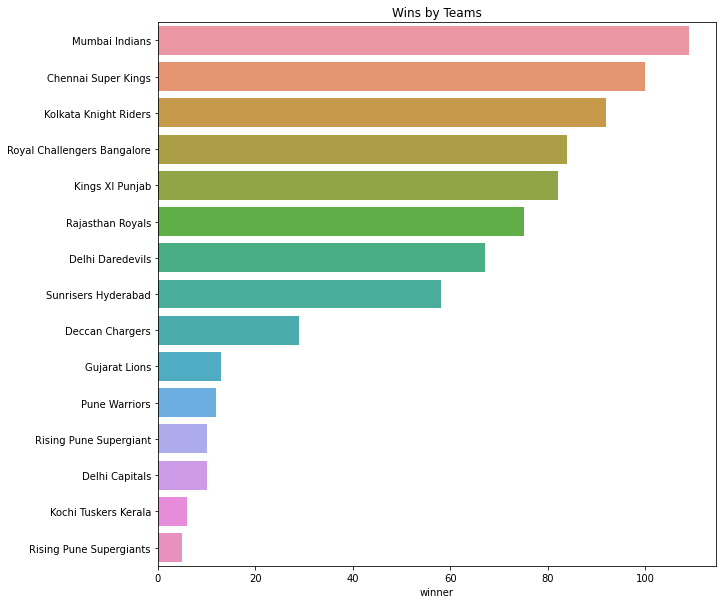

In [139]:
plt.figure(figsize=(10,10))
sns.barplot(x=winner,y=winner.index,orient='h')
plt.title("Wins by Teams")

# Mumbai Indians is the Most Successfull Team

In [140]:
motm=df_matches["player_of_match"].value_counts().nlargest(10)
motm

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

Text(0.5, 1.0, 'Top 10 Man of the Match ')

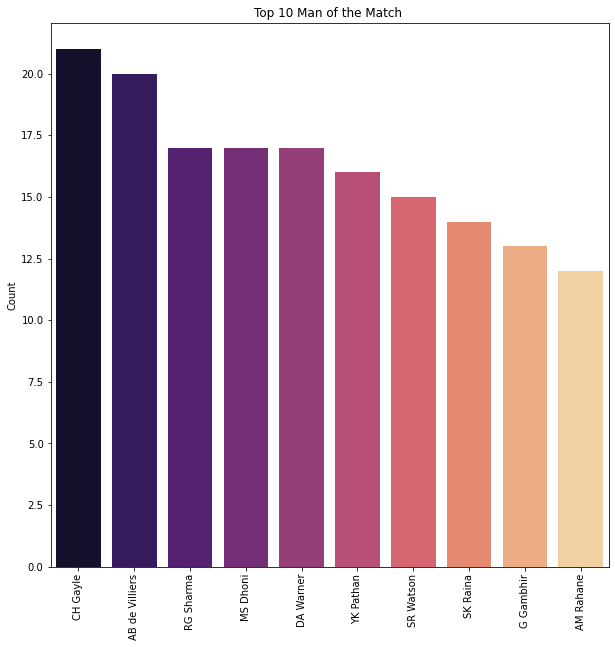

In [141]:
plt.figure(figsize=(10,10))
sns.barplot(x=motm.index,y=motm,data=df_matches,palette='magma')
plt.xticks(rotation='vertical')
plt.ylabel("Count")
plt.title("Top 10 Man of the Match ")

# Chris Gayle has the most man of the match awards

In [142]:
df_matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [143]:
toss=df_matches['toss_decision'].value_counts()
toss

field    463
bat      293
Name: toss_decision, dtype: int64

Text(0.5, 1.0, 'Toss Decision')

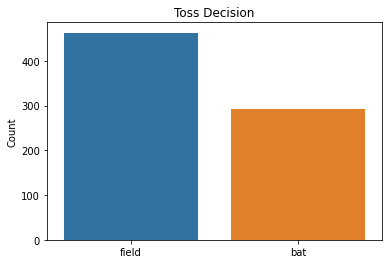

In [144]:
sns.barplot(x=toss.index,y=toss,data=df_matches)
plt.ylabel("Count")
plt.title("Toss Decision")

In [145]:
#Analysing Mumbai Indians(most successfull) wrt to toss decision
mi=((df_matches['toss_winner']=="Mumbai Indians") &(df_matches['winner']=="Mumbai Indians")).sum()
mi
# so mumbai have won 56 times after winning the toss

56

In [146]:
bat=((df_matches['toss_winner']=="Mumbai Indians")&(df_matches['toss_decision']=="bat") &(df_matches['winner']=="Mumbai Indians")).sum()
bat
#after winning the toss and electing to bat mumbai have won 25 matches

25

In [147]:
field=((df_matches['toss_winner']=="Mumbai Indians")&(df_matches['toss_decision']=="field") &(df_matches['winner']=="Mumbai Indians")).sum()
field
#after winning the toss and electing to field mumbai have won 31 matches

31

# Mumbai have won the toss 98 times out of which they have won the match 56 times


In [148]:
# top runscorers Overall
runs=df_deliveries.groupby('batsman')['batsman_runs'].sum().nlargest(5)
runs

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

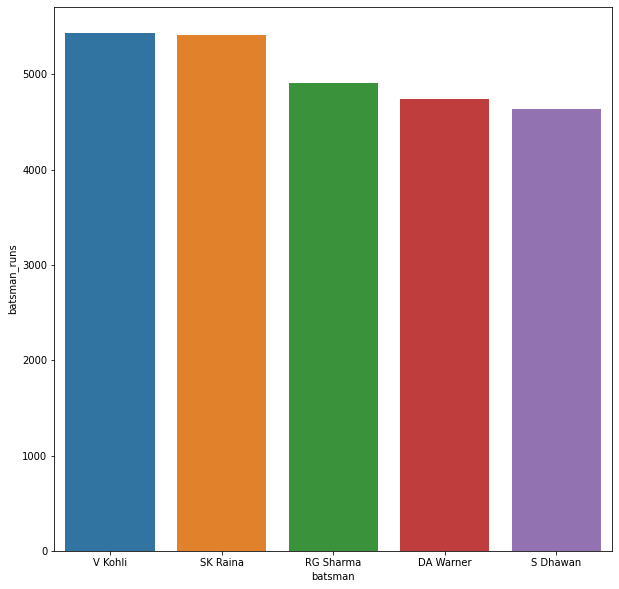

In [149]:
plt.figure(figsize=(10,10))
sns.barplot(x=runs.index,y=runs,data=df_deliveries)

In [150]:
df_matches['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(1, 0, 'Maharashtra Cricket Association Stadium'),
  Text(2, 0, 'Saurashtra Cricket Association Stadium'),
  Text(3, 0, 'Holkar Cricket Stadium'),
  Text(4, 0, 'M Chinnaswamy Stadium'),
  Text(5, 0, 'Wankhede Stadium'),
  Text(6, 0, 'Eden Gardens'),
  Text(7, 0, 'Feroz Shah Kotla'),
  Text(8, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(9, 0, 'Green Park'),
  Text(10, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(11, 0, 'Sawai Mansingh Stadium'),
  Text(12, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(13, 0, 'Dr DY Patil Sports Academy'),
  Text(14, 0, 'Newlands'),
  Text(15, 0, "St George's Park"),
  Text(16, 0, 'Kingsmead'),
  Text(17, 0, 'SuperSport Park'),
  Text(18, 0, 'Buffalo Park'),
  Text(19, 

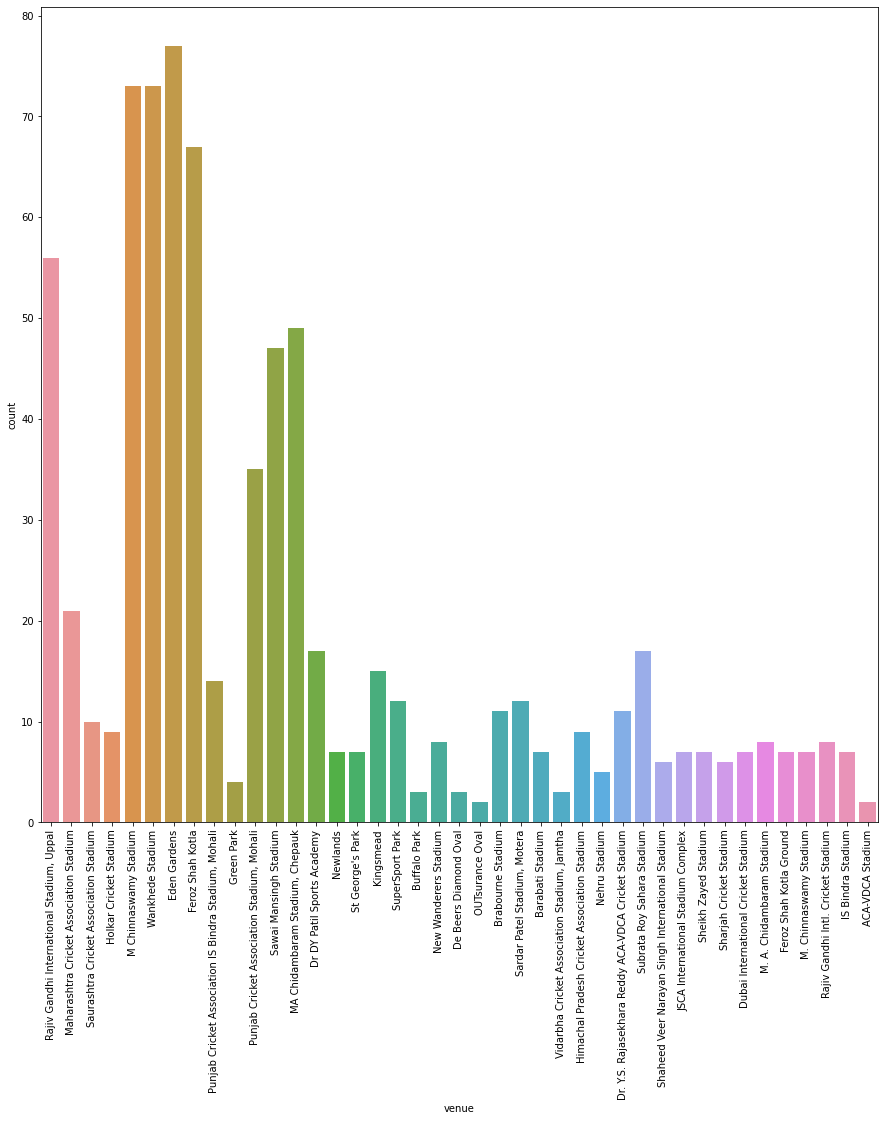

In [151]:
plt.figure(figsize=(15,15))
sns.countplot(x="venue",data=df_matches)
plt.xticks(rotation="vertical")


In [152]:
df_matches.groupby('winner')['win_by_runs'].sum().nlargest()

winner
Mumbai Indians                 1866
Chennai Super Kings            1778
Royal Challengers Bangalore    1252
Kolkata Knight Riders          1086
Kings XI Punjab                 925
Name: win_by_runs, dtype: int64

# Mumbai Indians have won by maximum runs

In [153]:
df_matches.groupby('winner')['win_by_wickets'].sum().nlargest()

winner
Kolkata Knight Riders          351
Royal Challengers Bangalore    314
Mumbai Indians                 307
Chennai Super Kings            289
Delhi Daredevils               275
Name: win_by_wickets, dtype: int64

# KKR have won by maximum wickets

In [154]:
df_matches['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SJA Taufel          1
A Nanda Kishore     1
Sundaram Ravi       1
SL Shastri          1
Ulhas Gandhe        1
Name: umpire1, Length: 61, dtype: int64

In [157]:
df=pd.merge(df_deliveries,df_matches,on="id")
df.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [159]:
df.groupby('season')['is_super_over'].sum()

season
2008     0
2009    11
2010     9
2011     0
2012     0
2013    25
2014    12
2015    11
2016     0
2017    13
2018     0
2019     0
Name: is_super_over, dtype: int64